#Using Iris Dataset

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets

In [151]:
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'])
df.head()
X=iris['data']

In [152]:
#how many different data is there in target
np.unique(iris['target'],return_counts=True)
#As we can see there are three different clusters in the dataset

(array([0, 1, 2]), array([50, 50, 50]))

##Elbow method for finding optimal number of clusters

In [153]:
distortions = [] # sum of squared distances from each point to its assigned center
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

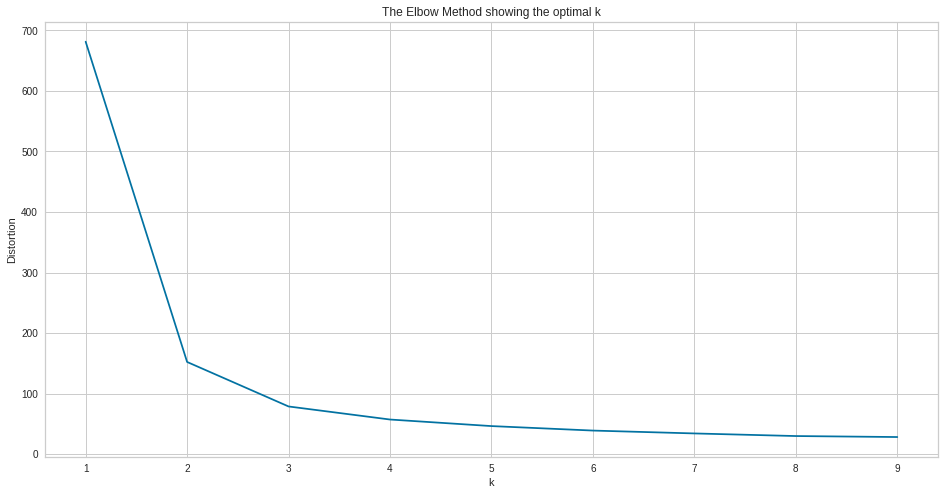

In [154]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, '-bx')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

###As we can se we are getting elbow of 2 that means optimal number of clusters is 2

##Training the model

In [155]:
model = KMeans(n_clusters=2)
 
model.fit(iris['data'])

KMeans(n_clusters=2)

In [156]:
df['kmeans_predict'] = model.predict(X)
df['target'] = iris['target']

Text(0.5, 1.0, 'K_Means')

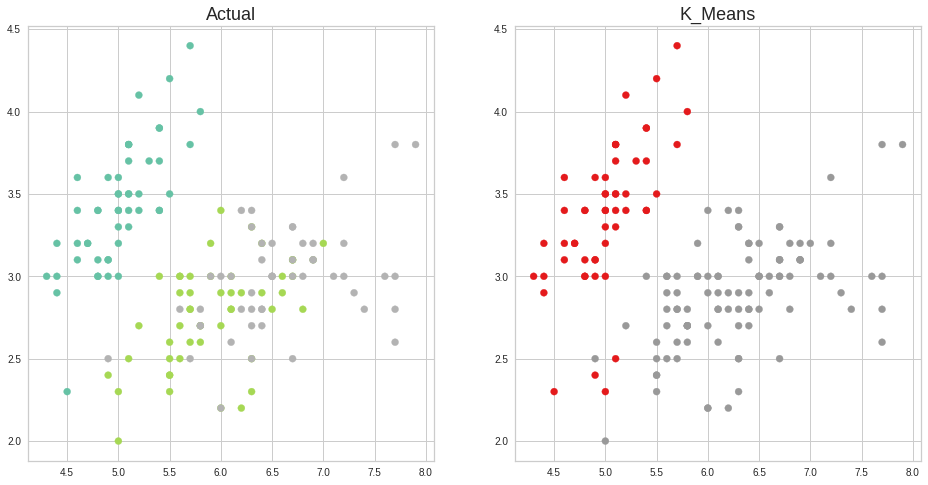

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df[0], df[1],c=df['target'], cmap=plt.cm.Set2)
axes[1].scatter(df[0], df[1], c=df['kmeans_predict'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

###As we can see from graph that kMeans is giving similar results as actual distribution (atually there is three clusters but kmeans giving us 2)

##Using Elbow visualizer

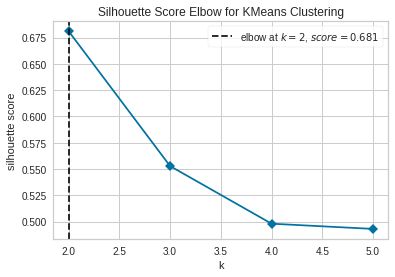

In [163]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=35)
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette',timings=False)
# Fit the data and visualize
visualizer.fit(X)
visualizer.poof()

In [158]:
kmeans = KMeans(n_clusters=2, random_state=35).fit(X)

In [159]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

In [160]:
# Get the cluster labels
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

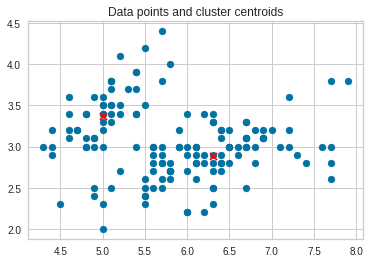

In [161]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[: , 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [162]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))

0.6810461692117462


#Using Diabetes dataset

In [164]:
diabetes = datasets.load_diabetes()

In [175]:
np.unique(diabetes.target,return_counts=True)

(array([ 25.,  31.,  37.,  39.,  40.,  42.,  43.,  44.,  45.,  47.,  48.,
         49.,  50.,  51.,  52.,  53.,  54.,  55.,  57.,  58.,  59.,  60.,
         61.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
         73.,  74.,  75.,  77.,  78.,  79.,  80.,  81.,  83.,  84.,  85.,
         86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,
         97.,  98.,  99., 100., 101., 102., 103., 104., 107., 108., 109.,
        110., 111., 113., 114., 115., 116., 118., 120., 121., 122., 123.,
        124., 125., 126., 127., 128., 129., 131., 132., 134., 135., 136.,
        137., 138., 139., 140., 141., 142., 143., 144., 145., 146., 147.,
        148., 150., 151., 152., 153., 154., 155., 156., 158., 160., 161.,
        162., 163., 164., 166., 167., 168., 170., 171., 172., 173., 174.,
        175., 177., 178., 179., 180., 181., 182., 183., 184., 185., 186.,
        187., 189., 190., 191., 192., 195., 196., 197., 198., 199., 200.,
        201., 202., 206., 208., 209., 

In [178]:
X = diabetes.data

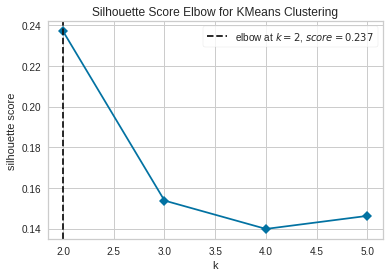

In [180]:
model = KMeans(random_state=35)
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette',timings=False)
# Fit the data and visualize
visualizer.fit(X)
visualizer.poof()

In [181]:
kmeans = KMeans(n_clusters=2, random_state=35).fit(X)

In [182]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[-0.017855  , -0.0161342 , -0.0251684 , -0.02190358, -0.02577673,
        -0.02757372,  0.02638684, -0.03554289, -0.03194521, -0.02614325],
       [ 0.01675864,  0.0151435 ,  0.02362297,  0.02055863,  0.02419395,
         0.02588059, -0.02476659,  0.03336044,  0.02998366,  0.02453796]])

In [183]:
# Get the cluster labels
kmeans.labels_

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

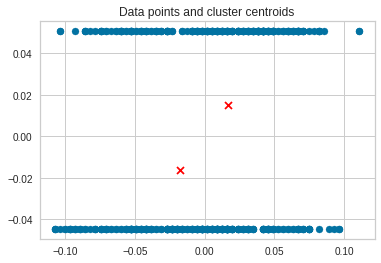

In [184]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[: , 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [185]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))

0.23698717031681765


##Diabetes dataset is for regression so here with clustering we are not getting Acceptable result